# 4. Machine learning with Spark MLlib

For this last lab, there will be no "walkthrough", you will be free to do your own machine learning project, as long as you follow these guidelines:

1. Choose **any** dataset from http://archive.ics.uci.edu/ml/index.php
2. Download the dataset file and upload to Databricks
3. Your solution notebook must have a part using RDDs, including **at least** the following steps:
  1. Reading the file into an RDD
  2. Converting into MLlib matrix or RDD of vectors
  3. Applying some statistics with the  MLlib's RDD API
  4. Learning a classification or regression model with the RDD API
  5. Applying the model to the test data and computing the errors
4. It also must include a part using DataFrames, including **at least** the following steps:
  1. Reading the file into a DataFrame:
  2. Running some aggregations and explorations using DataFrame functions (not MLlib!) 
  3. Creating a pipeline with **at least** one feature extraction/manipulation and one model estimator
  4. Fitting the pipeline to the training data
  5. Applying the model to the test data and computing the errors
  
Notes: 
  - Don't forget to split your data into training and test (and validation if you want) sets
  - You can start with the DataFrame part, if you want (I actually recommend doing it; it's easier to explore and understand the data using DFs)
  - You can do this project in groups of **2 members**
  - I'll accept submissions by e-mail until **Friday 19/03 23h59**
  - All submissions after the deadlines won't be considered
    - **It's much better to submit an incomplete solution than nothing at all!**
  - If you have any question or problem, don't hesitate to send me a slack message or an e-mail; I try to answer as quickly as possible (usually under 24h)
  
Resources:
  - [Spark MLlib guide](https://spark.apache.org/docs/latest/ml-guide.html)
  - [Databricks MLlib guide](https://docs.databricks.com/spark/latest/mllib/index.html#)
  - [pyspark MLlib RDD API docs](https://spark.apache.org/docs/latest/api/python/pyspark.mllib.html)
  - [pyspark MLlib DataFrame API docs](https://spark.apache.org/docs/latest/api/python/pyspark.ml.html)
  - [pyspark complete docs](https://spark.apache.org/docs/latest/api/python/)
  - [Course Homepage](https://danielpes.github.io/SparkCourse/)
  
### May the force be with you!

## Data

J'ai choisi le dataset Iris sur UCI machine learning, un jeu de données multivariées avec 3 classes (setosa, versicolor, viriginica) correspondant à  trois espèces des fleurs d'Iris.     
[Iris dataset](http://archive.ics.uci.edu/ml/datasets/Iris)

Ce dataset contient 150 échantillons dont 50 de chaque classe.    
Quatre caractéristiques ont été mesurées à partir de chaque échantillon : la longueur et la largeur des sépales et des pétales, en centimètres.     

On est dans dans un contexte de classification supervisée.

## Dataframe solution

### 1. Reading the file into a DataFrame:

In [0]:
from pyspark.sql.types import StructType
from pyspark.sql.types import DoubleType
from pyspark.sql.types import StringType

In [0]:
customSchema = StructType() \
              .add("sepal_length", DoubleType(),True) \
              .add("sepal_width", DoubleType(),True) \
              .add("petal_length", DoubleType(),True) \
              .add("petal_width", DoubleType(),True) \
              .add("label", StringType(),True) \

In [0]:

df = spark.read.csv("/FileStore/tables/iris.data", sep=",", header=False, schema=customSchema, inferSchema=True)
#           .schema(schema)

In [0]:
df.printSchema()

root
-- sepal_length: double (nullable = true)
-- sepal_width: double (nullable = true)
-- petal_length: double (nullable = true)
-- petal_width: double (nullable = true)
-- label: string (nullable = true)

In [0]:
df.show()

+------------+-----------+------------+-----------+-----------+
sepal_length|sepal_width|petal_length|petal_width| label|
+------------+-----------+------------+-----------+-----------+
 5.1| 3.5| 1.4| 0.2|Iris-setosa|
 4.9| 3.0| 1.4| 0.2|Iris-setosa|
 4.7| 3.2| 1.3| 0.2|Iris-setosa|
 4.6| 3.1| 1.5| 0.2|Iris-setosa|
 5.0| 3.6| 1.4| 0.2|Iris-setosa|
 5.4| 3.9| 1.7| 0.4|Iris-setosa|
 4.6| 3.4| 1.4| 0.3|Iris-setosa|
 5.0| 3.4| 1.5| 0.2|Iris-setosa|
 4.4| 2.9| 1.4| 0.2|Iris-setosa|
 4.9| 3.1| 1.5| 0.1|Iris-setosa|
 5.4| 3.7| 1.5| 0.2|Iris-setosa|
 4.8| 3.4| 1.6| 0.2|Iris-setosa|
 4.8| 3.0| 1.4| 0.1|Iris-setosa|
 4.3| 3.0| 1.1| 0.1|Iris-setosa|
 5.8| 4.0| 1.2| 0.2|Iris-setosa|
 5.7| 4.4| 1.5| 0.4|Iris-setosa|
 5.4| 3.9| 1.3| 0.4|Iris-setosa|
 5.1| 3.5| 1.4| 0.3|Iris-setosa|
 5.7| 3.8| 1.7| 0.3|Iris-setosa|
 5.1| 3.8| 1.5| 0.3|Iris-setosa|
+------------+-----------+------------+-----------+-----------+
only showing top 20 rows

### 2. Some aggregations and explorations using DataFrame functions

In [0]:
from pyspark.sql import functions as fn

Average, min, max de sepal_length par label

In [0]:
aggreg_sepal = df.groupBy("label").agg(fn.avg("sepal_length").alias("avg_sepal_length_by_species"),
                                  fn.min("sepal_length").alias("min_sepal_length_by_species"),
                                 fn.max("sepal_length").alias("max_sepal_length_by_species"),
                                )
aggreg_sepal.show()

+---------------+---------------------------+---------------------------+---------------------------+
 label|avg_sepal_length_by_species|min_sepal_length_by_species|max_sepal_length_by_species|
+---------------+---------------------------+---------------------------+---------------------------+
 Iris-virginica| 6.587999999999998| 4.9| 7.9|
 Iris-setosa| 5.005999999999999| 4.3| 5.8|
Iris-versicolor| 5.936| 4.9| 7.0|
+---------------+---------------------------+---------------------------+---------------------------+

Average, min, max de sepal_length par labels des sepal_length entre 4 et 5.7

In [0]:
aggreg_sepal2 = df.where(df.sepal_length.between(4,5.7)).groupBy("label").agg(fn.count("sepal_length").alias("Nb sepal_length between 4 and 5.7"))

aggreg_sepal2.show()

+---------------+---------------------------------+
 label|Nb sepal_length between 4 and 5.7|
+---------------+---------------------------------+
 Iris-virginica| 3|
 Iris-setosa| 49|
Iris-versicolor| 21|
+---------------+---------------------------------+

In [0]:
df.groupBy('label').agg(fn.avg("sepal_width"), fn.min("sepal_width"), fn.max("sepal_width")).show()

+---------------+------------------+----------------+----------------+
 label| avg(sepal_width)|min(sepal_width)|max(sepal_width)|
+---------------+------------------+----------------+----------------+
 Iris-virginica|2.9739999999999998| 2.2| 3.8|
 Iris-setosa|3.4180000000000006| 2.3| 4.4|
Iris-versicolor|2.7700000000000005| 2.0| 3.4|
+---------------+------------------+----------------+----------------+

Corrélation entre deux colonnes

In [0]:
test2 = df.select("*").agg(fn.corr("sepal_length", "sepal_width").alias("correlation-sepal_length-sepal_width"),
                           fn.corr("sepal_length", "petal_length").alias("correlation-sepal_length-petal_width"),
                          )
display(test2)

correlation-sepal_length-sepal_width,correlation-sepal_length-petal_width
-0.10936924995064931,0.8717541573048717


##### Exploring Data

In [0]:
display(df.describe())

summary,sepal_length,sepal_width,petal_length,petal_width,label
count,150,150,150,150,150
mean,5.843333333333335,3.0540000000000007,3.7586666666666693,1.1986666666666672,null
stddev,0.8280661279778637,0.43359431136217375,1.764420419952262,0.7631607417008414,null
min,4.3,2.0,1.0,0.1,Iris-setosa
max,7.9,4.4,6.9,2.5,Iris-virginica


In [0]:
import pandas as pd
from pandas.plotting import scatter_matrix

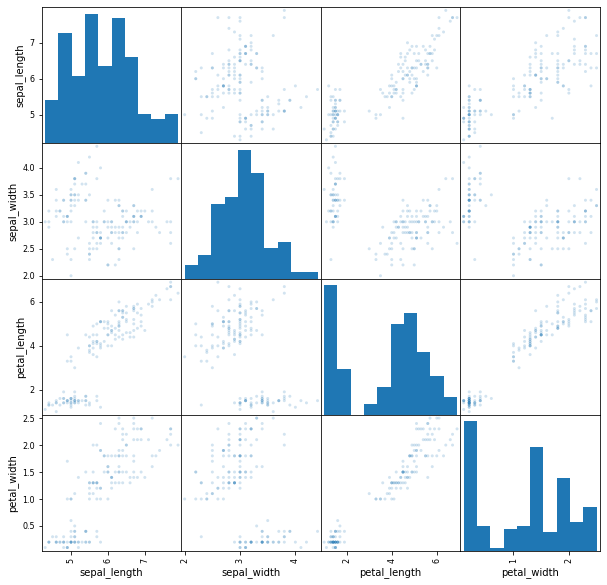

In [0]:
features_vec = df.select("sepal_length", "sepal_width", "petal_length", "petal_width").toPandas()
axs = scatter_matrix(features_vec, alpha=0.2, figsize=(10,10));

### 3. Pipeline with at least one feature extraction/manipulation and one model estimator

In [0]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline


Je transforme les labels en string en index avec `StringIndexer`

In [0]:
labelIndexer = StringIndexer(inputCol="label", outputCol="indexedLabel")

On vectorise nos features avec `VectorAssembler`

In [0]:
feature_cols = df.columns[:-1]
feature_cols

Out[16]: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [0]:
vectorAssembler = VectorAssembler(inputCols=feature_cols, outputCol="indexedFeatures")

J'utilise `DecisionTreeClassifier` comme classifieur

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier
dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")

On crée la pipeline

In [0]:
stages = [labelIndexer, vectorAssembler, dt]
pipeline = Pipeline(stages=stages)

### 4.Fitting the pipeline to the training data

##### On partionne les donées en train et test avec 70% train et 30% test

In [0]:
(train, test) = df.randomSplit([.7, .3])

In [0]:
train.count()

Out[21]: 114

In [0]:
test.count()

Out[22]: 36

Training

In [0]:
model = pipeline.fit(train)

### 5. Model on the test data and the computed errors

Prediction

In [0]:
predictions = model.transform(test)

In [0]:
# predictions.select("*").show(5)
predictions.select("prediction", "indexedLabel", "indexedFeatures").show(5)

+----------+------------+-----------------+
prediction|indexedLabel| indexedFeatures|
+----------+------------+-----------------+
 2.0| 2.0|[4.4,3.0,1.3,0.2]|
 2.0| 2.0|[4.5,2.3,1.3,0.3]|
 2.0| 2.0|[4.6,3.1,1.5,0.2]|
 2.0| 2.0|[4.6,3.4,1.4,0.3]|
 2.0| 2.0|[4.6,3.6,1.0,0.2]|
+----------+------------+-----------------+
only showing top 5 rows

Evaluation of model

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [0]:
evaluator = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")

In [0]:
accuracy = evaluator.evaluate(predictions)

In [0]:
print(accuracy)

0.8888888888888888

Errors

In [0]:
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.111111

## Test de divers paramètres  avec `ParamGrid` et `Cross Validation`

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

ParamGrid

In [0]:

paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [2, 5, 10,20,25,30])
             .addGrid(dt.minInstancesPerNode,[1, 5, 10])
             .build())

Cross Validation

In [0]:
cv = CrossValidator(estimator=pipeline, \
                    estimatorParamMaps=paramGrid, \
                    evaluator=evaluator)

In [0]:
cvModel = cv.fit(train)

/databricks/spark/python/pyspark/ml/util.py:762: UserWarning: Cannot find mlflow module. To enable MLflow logging, install mlflow from PyPI.
 warnings.warn(_MLflowInstrumentation._NO_MLFLOW_WARNING)

In [0]:
predictions2 = cvModel.transform(test)
# evaluator2 = MulticlassClassificationEvaluator(labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
evaluator.evaluate(predictions2)

Out[35]: 0.9166666666666666

## RDD solution

### 1. Reading the file into an RDD

In [0]:
rdd = sc.textFile("/FileStore/tables/iris.data")

In [0]:
rdd.take(5)

Out[37]: ['5.1,3.5,1.4,0.2,Iris-setosa',
 '4.9,3.0,1.4,0.2,Iris-setosa',
 '4.7,3.2,1.3,0.2,Iris-setosa',
 '4.6,3.1,1.5,0.2,Iris-setosa',
 '5.0,3.6,1.4,0.2,Iris-setosa']

### 2. Converting into RDD of vectors

In [0]:
rdd = rdd.filter(lambda x: x != '').map(lambda line: line.strip().split(","))

In [0]:
rdd.take(5)

Out[39]: [['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'],
 ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa'],
 ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa'],
 ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa'],
 ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa']]

In [0]:
def getFeatures(line):
  sepal_length = line[0]
  sepal_width = line[1]
  petal_length = line[2]
  petal_width = float(line[3])
  return [sepal_length, sepal_width, petal_length, petal_width]

In [0]:
features = rdd.map(getFeatures)

In [0]:
features.count()

Out[42]: 150

### 3. Statistiques

In [0]:
from pyspark.mllib.stat import Statistics

In [0]:
summary = Statistics.colStats(features)

In [0]:
print("Min")
print(summary.min())
print("Max")
print(summary.max())

Min
[4.3 2. 1. 0.1]
Max
[7.9 4.4 6.9 2.5]

In [0]:
print(summary.mean())

[5.84333333 3.054 3.75866667 1.19866667]

In [0]:
print(summary.variance())


[0.68569351 0.18800403 3.11317942 0.58241432]

In [0]:
print(summary.numNonzeros())

[150. 150. 150. 150.]

In [0]:
print(Statistics.corr(features, method="pearson"))

[[ 1. -0.10936925 0.87175416 0.81795363]
 [-0.10936925 1. -0.4205161 -0.35654409]
 [ 0.87175416 -0.4205161 1. 0.9627571 ]
 [ 0.81795363 -0.35654409 0.9627571 1. ]]

**Test du khi-deux**

Pour faire le test du khi-deux on a besoin de `LabeledPoint`, on va mettre nos features sous ce format

In [0]:
def mapSpeciesType(species_name):
  if species_name == 'Iris-setosa':
    return 0
  elif species_name == 'Iris-versicolor':
     return 1
  elif species_name == 'Iris-virginica':
    return 2

In [0]:
from pyspark.mllib.regression import LabeledPoint

In [0]:
def createLabeledPoints(vec):
  sepal_length = float(vec[0])
  sepal_width = float(vec[1])
  petal_length = float(vec[2])
  petal_width = float(vec[3])
  species = mapSpeciesType(vec[4])
  return LabeledPoint(species, [sepal_length, sepal_width, petal_length, petal_width])

In [0]:
data = rdd.map(createLabeledPoints)

In [0]:
data.take(5)

Out[54]: [LabeledPoint(0.0, [5.1,3.5,1.4,0.2]),
 LabeledPoint(0.0, [4.9,3.0,1.4,0.2]),
 LabeledPoint(0.0, [4.7,3.2,1.3,0.2]),
 LabeledPoint(0.0, [4.6,3.1,1.5,0.2]),
 LabeledPoint(0.0, [5.0,3.6,1.4,0.2])]

In [0]:
featureTestResults = Statistics.chiSqTest(data)
for i, result in enumerate(featureTestResults):
    print("Column %d:\n%s" % (i + 1, result))
    print("\n")

Column 1:
Chi squared test summary:
method: pearson
degrees of freedom = 68 
statistic = 156.26666666666665 
pValue = 6.6659873176888595E-9 
Very strong presumption against null hypothesis: the occurrence of the outcomes is statistically independent..


Column 2:
Chi squared test summary:
method: pearson
degrees of freedom = 44 
statistic = 88.36446886446883 
pValue = 8.303947787857702E-5 
Very strong presumption against null hypothesis: the occurrence of the outcomes is statistically independent..


Column 3:
Chi squared test summary:
method: pearson
degrees of freedom = 84 
statistic = 271.79999999999995 
pValue = 0.0 
Very strong presumption against null hypothesis: the occurrence of the outcomes is statistically independent..


Column 4:
Chi squared test summary:
method: pearson
degrees of freedom = 42 
statistic = 271.75 
pValue = 0.0 
Very strong presumption against null hypothesis: the occurrence of the outcomes is statistically independent..

### 4. Classification  model with the RDD API

on coupe les données `data` qui ont été mis précédemment sous forme `LabeledPoint` en train et test

In [0]:
(trainingData, testData) = data.randomSplit([0.7, 0.3])

In [0]:
from pyspark.mllib.tree import DecisionTree

In [0]:
model = DecisionTree.trainClassifier(trainingData,numClasses=3, categoricalFeaturesInfo={}, impurity='gini', maxDepth=5, maxBins=32)

### 5. Model on the test data and the errors

In [0]:
predictions = model.predict(testData.map(lambda x: x.features))

In [0]:
labelsAndPreds = testData.map(lambda lp: lp.label)\
                         .zip(predictions)

In [0]:
testErr = labelsAndPreds.filter(lambda lp: lp[0] != lp[1])\
                        .count() / float(testData.count())

Error

In [0]:
testErr

Out[64]: 0.061224489795918366